In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from distmetrics import compute_mahalonobis_dist_2d, get_asf_rtc_burst_ts, read_asf_rtc_image_data, despeckle_rtc_arrs_with_tv, compute_mahalonobis_dist_1d
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

See the fire example (Fire starts Feb 4)

In [3]:
BURST_ID = 'T018_038457_IW2'

In [4]:
df_rtc_ts = get_asf_rtc_burst_ts(BURST_ID)
print('# of results: ', df_rtc_ts.shape[0])
df_rtc_ts.head()

# of results:  22


opera_id  \
0  OPERA_L2_RTC-S1_T018-038457-IW2_20231007T23284...   
1  OPERA_L2_RTC-S1_T018-038457-IW2_20231019T23284...   
2  OPERA_L2_RTC-S1_T018-038457-IW2_20231031T23284...   
3  OPERA_L2_RTC-S1_T018-038457-IW2_20231112T23284...   
4  OPERA_L2_RTC-S1_T018-038457-IW2_20231124T23284...   

               acq_datetime polarization  \
0 2023-10-07 23:28:48+00:00        VV+VH   
1 2023-10-19 23:28:48+00:00        VV+VH   
2 2023-10-31 23:28:48+00:00        VV+VH   
3 2023-11-12 23:28:48+00:00        VV+VH   
4 2023-11-24 23:28:47+00:00        VV+VH   

                                              url_vh  \
0  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...   
1  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...   
2  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...   
3  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...   
4  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...   

                                              url_vv  track_number  \
0  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...            18   
1  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...            18   
2  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...            18   
3  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...            18   
4  https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...            18   

                                            geometry  \
0  POLYGON ((-71.56223 -33.27870, -71.50894 -33.2...   
1  POLYGON ((-71.56304 -33.27879, -71.50975 -33.2...   
2  POLYGON ((-71.56189 -33.27894, -71.09011 -33.1...   
3  POLYGON ((-71.56319 -33.27800, -71.09140 -33.1...   
4  POLYGON ((-71.56064 -33.27817, -71.08885 -33.1...   

                                           dedup_id  
0  OPERA_L2_RTC-S1_T018-038457-IW2_20231007T232848Z  
1  OPERA_L2_RTC-S1_T018-038457-IW2_20231019T232848Z  
2  OPERA_L2_RTC-S1_T018-038457-IW2_20231031T232848Z  
3  OPERA_L2_RTC-S1_T018-038457-IW2_20231112T232848Z  
4  OPERA_L2_RTC-S1_T018-038457-IW2_20231124T232847Z

In [5]:
arrs_vv, profiles = read_asf_rtc_image_data(df_rtc_ts.url_vv.tolist())
arrs_vh, _ = read_asf_rtc_image_data(df_rtc_ts.url_vh.tolist())

Loading RTC data: 100%|██████████████████████████████████████████████████| 22/22 [00:22<00:00,  1.04s/it]


In [6]:
arrs_vv_d = despeckle_rtc_arrs_with_tv(arrs_vv)
arrs_vh_d = despeckle_rtc_arrs_with_tv(arrs_vh)

  0%|                                                                             | 0/22 [00:00<?, ?it/s]

  0%|                                                                             | 0/22 [00:00<?, ?it/s]

In [7]:
for k, date in enumerate(df_rtc_ts.acq_datetime):
    print(k, date)

0 2023-10-07 23:28:48+00:00
1 2023-10-19 23:28:48+00:00
2 2023-10-31 23:28:48+00:00
3 2023-11-12 23:28:48+00:00
4 2023-11-24 23:28:47+00:00
5 2023-12-06 23:28:47+00:00
6 2023-12-18 23:28:46+00:00
7 2023-12-30 23:28:46+00:00
8 2024-01-11 23:28:45+00:00
9 2024-01-23 23:28:44+00:00
10 2024-02-04 23:28:44+00:00
11 2024-02-16 23:28:44+00:00
12 2024-02-28 23:28:44+00:00
13 2024-03-11 23:28:44+00:00
14 2024-03-23 23:28:44+00:00
15 2024-04-04 23:28:45+00:00
16 2024-04-16 23:28:45+00:00
17 2024-04-28 23:28:46+00:00
18 2024-05-10 23:28:46+00:00
19 2024-05-22 23:28:45+00:00
20 2024-06-03 23:28:45+00:00
21 2024-06-15 23:28:45+00:00


The fires started ~Feb 4.

In [8]:
pre_slice = slice(5, 10) # excludes last index
post_index = 10

In [28]:
dist2d_ob = compute_mahalonobis_dist_2d(arrs_vv_d[pre_slice],
                                        arrs_vh_d[pre_slice],
                                        arrs_vv_d[post_index],
                                        arrs_vh_d[post_index],
                                        window_size=3)

/Users/cmarshak/bekaert-team/distmetrics/src/distmetrics/mahalanobis.py:57: RuntimeWarning: Mean of empty slice
  mu_st = np.nanmean(mu_spatial, axis=0)
/Users/cmarshak/bekaert-team/distmetrics/src/distmetrics/mahalanobis.py:75: RuntimeWarning: Mean of empty slice
  var_st = np.nanmean(var_spatial, axis=0)
/Users/cmarshak/bekaert-team/distmetrics/src/distmetrics/mahalanobis.py:139: RuntimeWarning: Mean of empty slice
  corr_st = np.nanmean(corr_s, axis=0)


In [20]:
dist_vv_ob = compute_mahalonobis_dist_1d(arrs_vv_d[pre_slice],
                                         arrs_vv_d[post_index],
                                         window_size=3)

dist_vh_ob = compute_mahalonobis_dist_1d(arrs_vh_d[pre_slice],
                                         arrs_vh_d[post_index],
                                         window_size=3)

/Users/cmarshak/bekaert-team/distmetrics/src/distmetrics/mahalanobis.py:292: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma)


## 2d Mahalanobis Distance

Text(0, 0.5, 'Easting (m)')

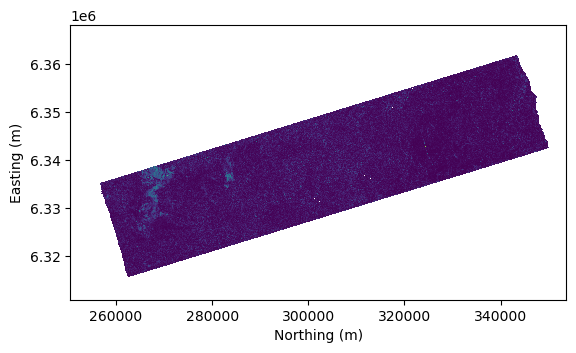

In [21]:
fig, ax = plt.subplots()
show(dist2d_ob.dist, interpolation='none', transform=profiles[0]['transform'], ax=ax)
ax.set_xlabel('Northing (m)')
ax.set_ylabel('Easting (m)')

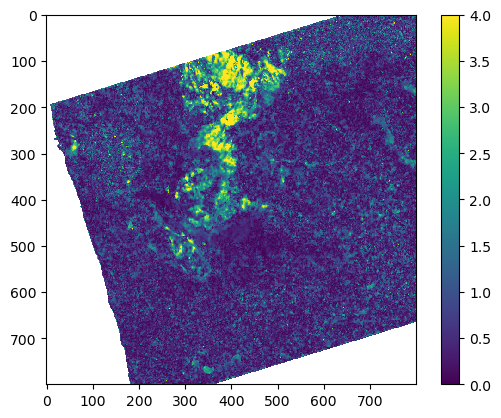

In [47]:
s = np.s_[900:1700, 200:1000]
plt.imshow(dist2d_ob.dist[s], interpolation='none', vmin=0, vmax=4)
plt.colorbar()

## Comparing Metrics

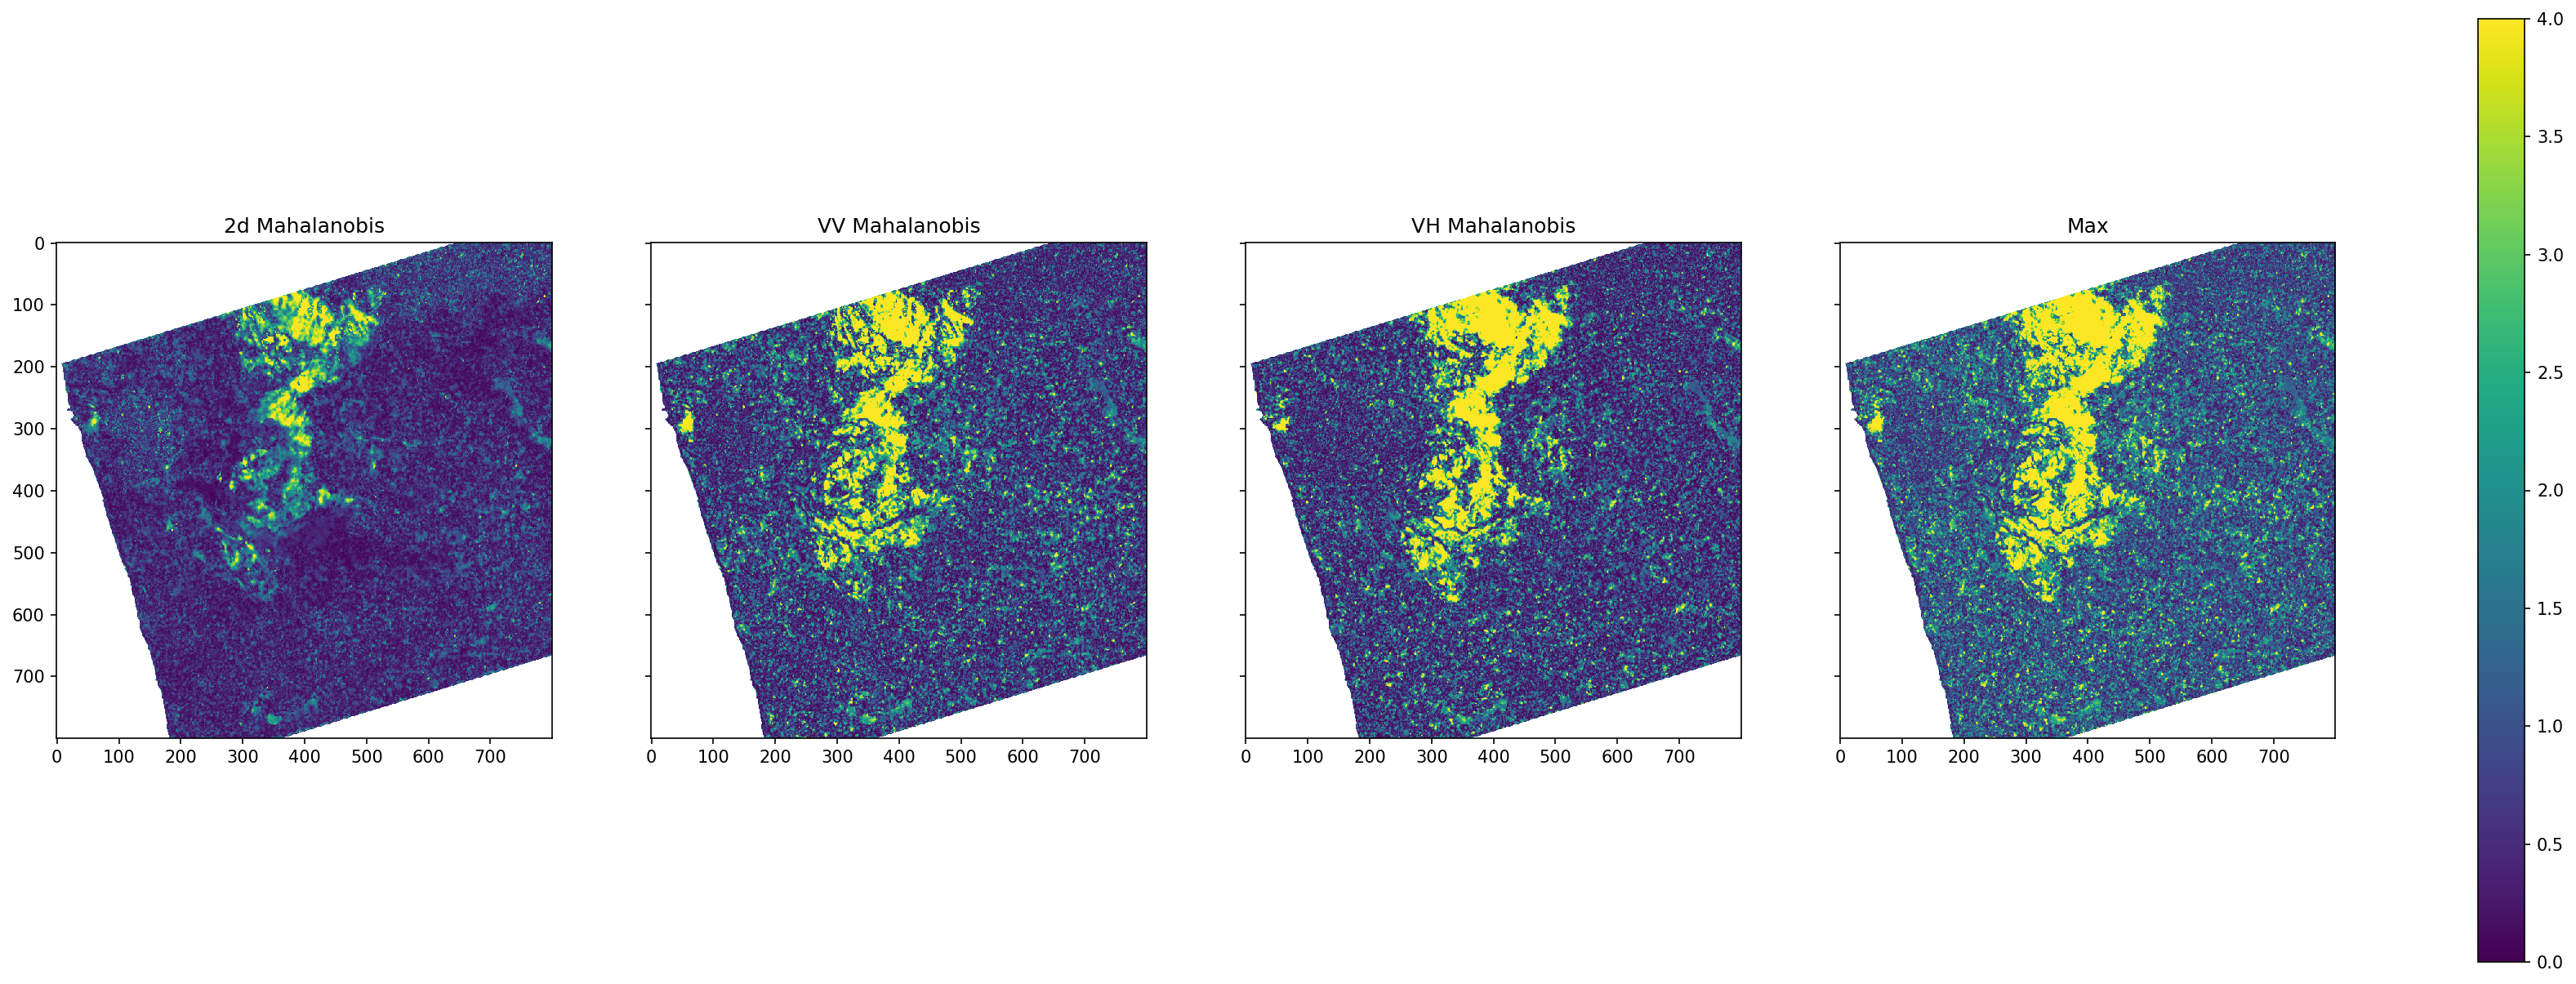

In [48]:
d_vv = dist_vv_ob.dist
d_vh = dist_vh_ob.dist
d_2d = dist2d_ob.dist
d_max = np.maximum(d_vv, d_vh)

metrics = [d_2d,
           d_vv,
           d_vh,
           d_max]
metric_names = ['2d Mahalanobis', 'VV Mahalanobis', 'VH Mahalanobis', 'Max']
N = len(metrics)


fig, axs = plt.subplots(1, N, figsize=(10 + N * 5, 10), dpi=150, sharey=True)

for ax, met, mn in zip(axs, metrics, metric_names):
    im = ax.imshow(met[s], vmin=0, vmax=4, interpolation='none')
    ax.set_title(mn)
fig.colorbar(im, ax=axs.ravel().tolist())

In [49]:
M = np.isnan(arrs_vh[0])

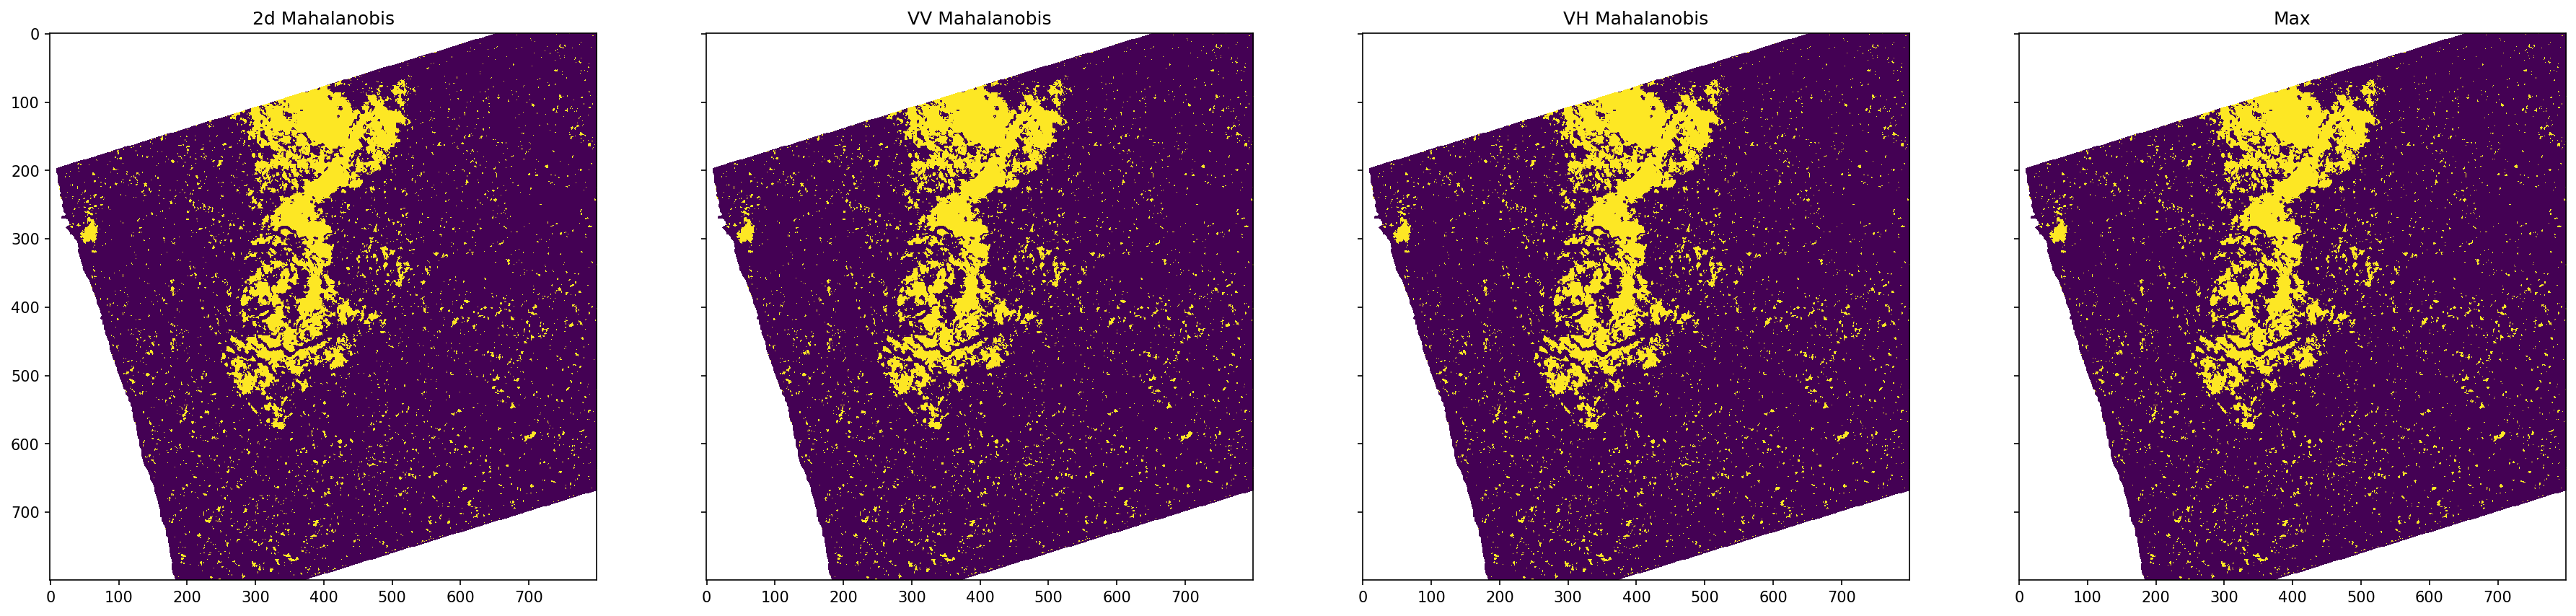

In [50]:
fig, axs = plt.subplots(1, N, figsize=(10 + N * 5, 10), dpi=150, sharey=True)

T = 3

c = (met > T).astype(float)
c[M] = np.nan

for ax, met, mn in zip(axs, metrics, metric_names):
    ax.imshow(c[s], vmin=0, vmax=1, interpolation='none')
    ax.set_title(mn)

In [51]:
metric_names

['2d Mahalanobis', 'VV Mahalanobis', 'VH Mahalanobis', 'Max']

[Text(1, -1, 'VH Mahalanobis change but not VV Mahalanobis'),
 Text(1, 0, 'Agree'),
 Text(1, 1, 'VV Mahalanobis change but not VH Mahalanobis')]

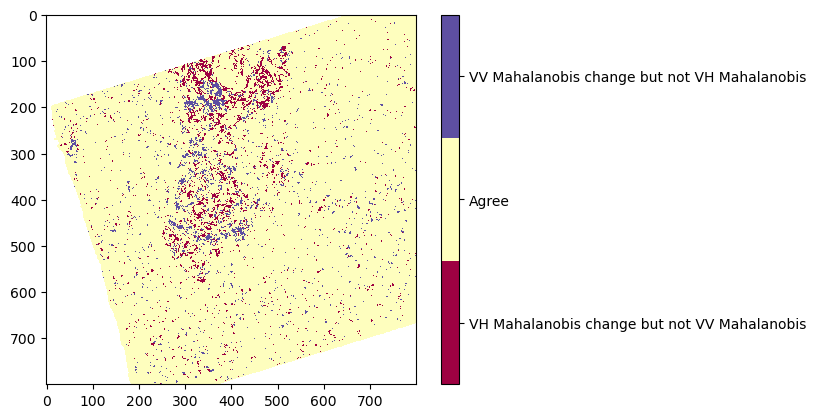

In [55]:
import matplotlib.colors as mcolors

i0 = 1
i1 = 2

m0 = (metrics[i0] > T).astype(float)
m1 = (metrics[i1] > T).astype(float)

mn0 = metric_names[i0]
mn1 = metric_names[i1]

cmap = plt.get_cmap('Spectral') 
values = [-1, 0, 1]  
bnds = [values[0] - .5] + [v + .5 for v in values]

# Create a normalization object
norm = mcolors.BoundaryNorm(boundaries=bnds, ncolors=cmap.N, clip=True)

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

diff = m0 - m1
diff[M] = np.nan
im = plt.imshow(diff[s], interpolation='none', vmin=-1, vmax=1, cmap='Spectral')


# Add the colorbar
cbar = plt.colorbar(im, ticks=values, boundaries=bnds)

labels = [f'{mn1} change but not {mn0}', 'Agree', f'{mn0} change but not {mn1}']
cbar.ax.set_yticklabels(labels)  # Replace with your custom labels
